## Classification Assignment

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from statistics import mean,pstdev
import warnings
warnings.filterwarnings('ignore')

### Functions

In [22]:
def knn_model(X_train,X_test,y_train,y_test):
    'K-NN Model'
    scores = []
    for i in range(1,21):
        knn_classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2) # number of neigbours set by iterator i
        knn_classifier.fit(X_train,y_train)
        y_pred = knn_classifier.predict(X_test)
        score = f1_score(y_test,y_pred)
        scores.append(score)
    return scores, y_pred

def logistic_model(X_train,X_test,y_train,y_test):
    'Logistic Regression'
    logistic = LogisticRegression()
    logistic.fit(X_train, y_train)
    y_pred = logistic.predict(X_test)
    score = f1_score(y_test,y_pred)
    return score, y_pred


def Linear_SVC(X_train,X_test,y_train,y_test):
    'Linear Support Vector Classifier (SVC)'
    L_svc = LinearSVC(loss='hinge')
    L_svc.fit(X_train,y_train)
    y_pred = L_svc.predict(X_test)
    score = f1_score(y_test,y_pred)
    return score, y_pred


def Poly_SVC(X_train,X_test,y_train,y_test):
    'Polynomial SVC'
    range_m = [2,3,4,5]
    scores = []
    for m in range_m: 
        Poly_svc = SVC(kernel = 'poly',degree = m) # degree set by iterator m
        Poly_svc.fit(X_train,y_train)
        y_pred = Poly_svc.predict(X_test)
        score = f1_score(y_test,y_pred)
        scores.append(score)
    return scores, y_pred

def Gaussian_SVC(X_train,X_test,y_train,y_test):
    'Gaussian (RBF) SVC'
    range_c = [0.2,0.5,1.2,1.8,3]
    scores = []
    for c in range_c: 
        Gaussian_svc = SVC(kernel = 'rbf',gamma = 'auto',C = c)
        Gaussian_svc.fit(X_train,y_train)
        y_pred = Gaussian_svc.predict(X_test)
        score = f1_score(y_test,y_pred)
        scores.append(score)
    return scores, y_pred

def plot_eval_f1(model_name, parameter, mean_f1, std_f1):
    'Plot hyper parameter evaluation for each model'
    fig, ax = plt.subplots()
    ax.plot(mean_f1.index,mean_f1.values)
    ax.fill_between(mean_f1.index, mean_f1.values-std_f1, mean_f1.values+std_f1, color='b', alpha=.1)
    plt.title(model_name)
    plt.xlabel("Value of {}".format(parameter))
    plt.ylabel("f1 mean score")
    plt.xticks(rotation=45)    

### EDA

In [4]:
data = pd.read_csv('dataset.csv')
data.head(10)
data.info()
data.duplicated(subset=None,keep='first').value_counts()
# no-null values, no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height     1001 non-null   int64
 1   Salary     1001 non-null   int64
 2   Purchased  1001 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


False    1001
dtype: int64

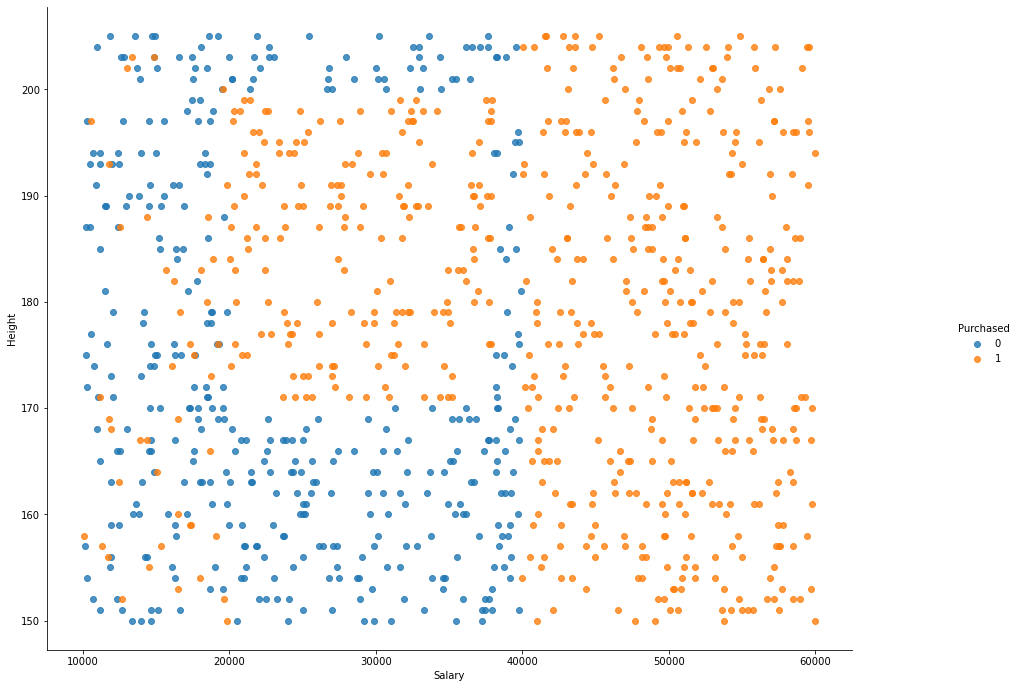

In [5]:
# visualize the data
sns.lmplot('Salary', 'Height', data, hue='Purchased', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

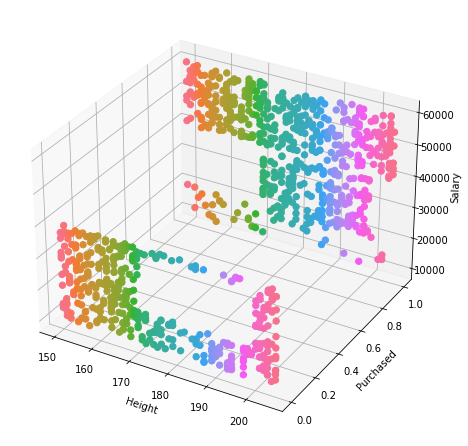

In [6]:
# 3d scatter plot
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sc = ax.scatter(data['Height'], data['Purchased'], data['Salary'], s=40, c=data['Height'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Height')
ax.set_ylabel('Purchased')
ax.set_zlabel('Salary')
# legend
plt.savefig("scatter_hue", bbox_inches='tight')

Count 1s and 0s:

<AxesSubplot:xlabel='Purchased', ylabel='count'>

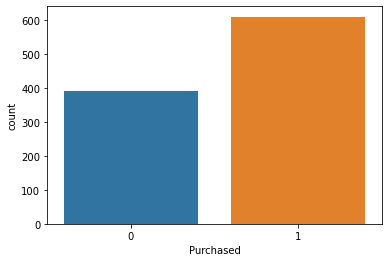

In [7]:
sns.countplot(data['Purchased'], label = "Count")

<AxesSubplot:>

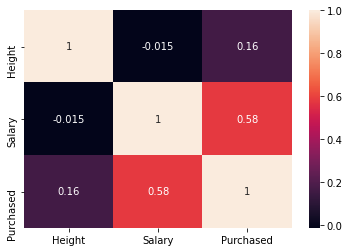

In [13]:
sns.heatmap(data.corr(),annot=True)

Features have low correlation

<AxesSubplot:xlabel='Height'>

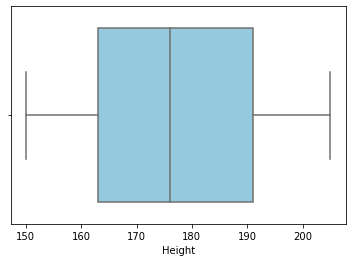

In [10]:
sns.boxplot(x=data['Height'],color='skyblue')


<AxesSubplot:xlabel='Salary'>

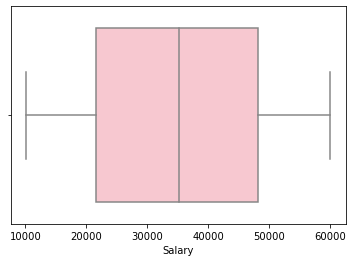

In [11]:
sns.boxplot(x=data['Salary'],color='pink')

Doesn't look like the data has outliers, and is pretty balanced overall with the median set in the middle and balanced whiskers.

### Classification

In [14]:
X, y = data.drop(['Purchased'], axis=1), data['Purchased']
scaler = StandardScaler()

In [15]:
colNames_knn = []
colNames_poly = []
colNames_gaussian = []
for k in range(1,21):
    colNames_knn.append("k = {}".format(k))

for m in [2,3,4,5]:
    colNames_poly.append("m = {}".format(m))

for c in [0.2,0.5,1.2,1.8,3]:
    colNames_gaussian.append("c = {}".format(c))

df_knn = pd.DataFrame(columns = colNames_knn)
df_poly = pd.DataFrame(columns = colNames_poly)
df_gaussian = pd.DataFrame(columns = colNames_gaussian)


In [16]:
list_f1_Logistic=[]
list_f1_LSVC = []

import timeit

start = timeit.default_timer()

for split in range(1,1001):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None) #randomly-initialized RandomState (none) 
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    f1Scores_knn, y_pred_knn = knn_model(X_train,X_test,y_train,y_test)
    knn_series = pd.Series(f1Scores_knn, index = df_knn.columns)
    df_knn = df_knn.append(knn_series, ignore_index=True)
    
    f1Score_logistic, y_pred_logistic = logistic_model(X_train,X_test,y_train,y_test)
    list_f1_Logistic.append(f1Score_logistic)
    
    f1Score_LSVC, y_pred_LSVC = Linear_SVC(X_train,X_test,y_train,y_test)
    list_f1_LSVC.append(f1Score_LSVC)
    
    f1Scores_poly, y_pred_poly = Poly_SVC(X_train,X_test,y_train,y_test)
    poly_series = pd.Series(f1Scores_poly,index = df_poly.columns)
    df_poly = df_poly.append(poly_series, ignore_index=True)
    
    f1Scores_gaussian, y_pred_gaussian = Gaussian_SVC(X_train,X_test,y_train,y_test)
    gaussian_series = pd.Series(f1Scores_gaussian,index = df_gaussian.columns)
    df_gaussian = df_gaussian.append(gaussian_series, ignore_index=True)

stop = timeit.default_timer()
print('Time: ', stop - start)


Time:  363.8633524


The multiple iterations require long run time ...

In [17]:
mean_f1_knn, std_f1_knn= df_knn.mean(axis=0), df_knn.std(axis=0)
mean_f1_poly, std_f1_poly= df_poly.mean(axis=0), df_poly.std(axis=0)
mean_f1_gaussian, std_f1_gaussian= df_gaussian.mean(axis=0), df_gaussian.std(axis=0)
mean_f1_logistic, std_f1_logistic = mean(list_f1_Logistic), pstdev(list_f1_Logistic)
mean_f1_LSVC, std_f1_LSVC = mean(list_f1_LSVC), pstdev(list_f1_LSVC)

In [18]:
mean_f1_knn.name, std_f1_knn.name = 'Mean f1 Score', 'STD f1 Score'
mean_f1_poly.name, std_f1_poly.name = 'Mean f1 Score', 'STD f1 Score'
mean_f1_gaussian.name, std_f1_gaussian.name = 'Mean f1 Score', 'STD f1 Score'

In [19]:
dic_model_scores = {}
dic_model_scores['Logistic Regression'] = {'Mean':mean_f1_logistic, 'STD':std_f1_logistic}
dic_model_scores['Linear SVC'] = {'Mean':mean_f1_LSVC, 'STD':std_f1_LSVC}

In [20]:
f1_scores_knn = pd.concat([mean_f1_knn,std_f1_knn],axis=1)
f1_scores_poly = pd.concat([mean_f1_poly,std_f1_poly],axis=1)
f1_scores_gaussian = pd.concat([mean_f1_gaussian,std_f1_gaussian],axis=1)

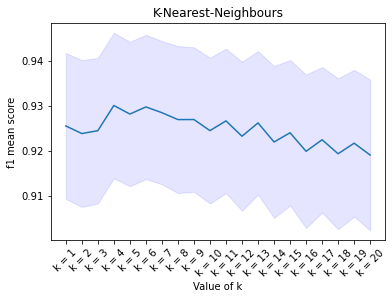

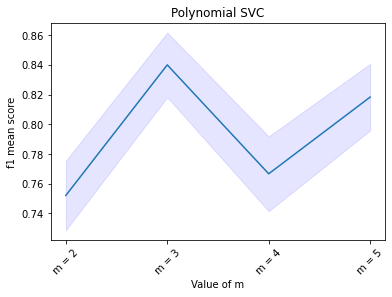

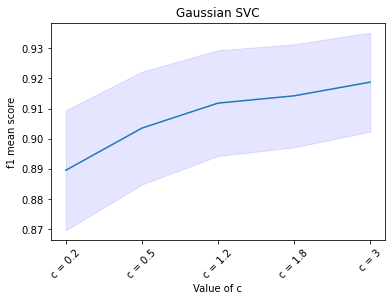

In [21]:
plot_titles = ["K-Nearest-Neighbours", "Polynomial SVC", "Gaussian SVC"]
plot_eval_f1(plot_titles[0],"k",mean_f1_knn,std_f1_knn)
plot_eval_f1(plot_titles[1],"m",mean_f1_poly,std_f1_poly)
plot_eval_f1(plot_titles[2],"c",mean_f1_gaussian,std_f1_gaussian)

In [23]:
pd.DataFrame(dic_model_scores)

,Logistic Regression,Linear SVC
Mean,0.815943,0.821090
STD,0.023498,0.023823
